In [1]:
# pandas: Used for data manipulation and analysis, specifically for handling DataFrames.
# numpy: Provides support for numerical operations, especially with arrays and matrices.
# seaborn: For statistical data visualization, making it easier to create informative plots.
# matplotlib: A plotting library used for creating static, interactive, and animated visualizations.
# scikit-learn: Contains tools for machine learning, including preprocessing, model training, and evaluation.
# xgboost: An implementation of gradient boosting that is used for building highly efficient regression and classification models.

%pip install pandas numpy seaborn matplotlib scikit-learn xgboost

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from xgboost import XGBRegressor
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [3]:
#Step 1: Load the data
data = pd.read_csv('C:/Users/ALISHBA JAWED/Desktop/House Pricing Prediction/Housing.csv')
print(data.head())

      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  


In [4]:
#Step 2: Data Cleaning and Preprocessing
print(data.isnull().sum()) #result shows data has no missing values

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64


In [5]:
data = data.dropna(subset=['price'])

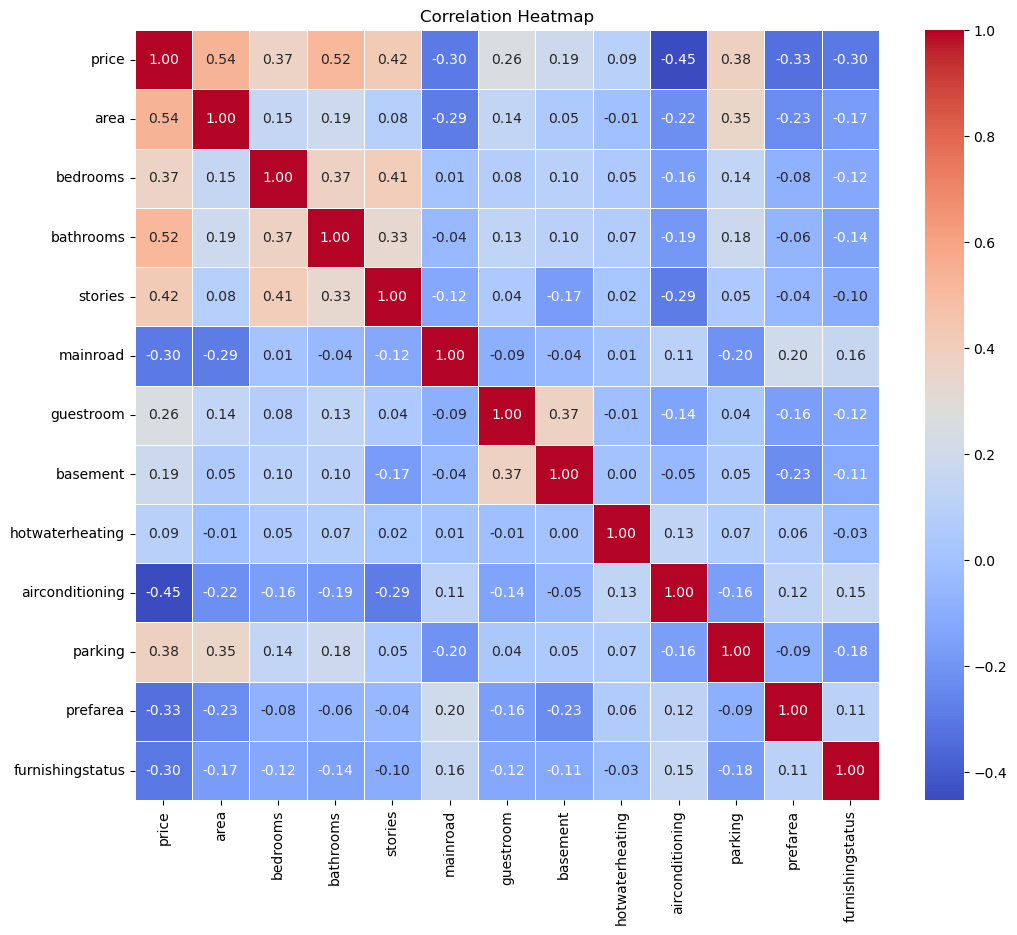

In [6]:
#Correlation Heatmap
#Convert categorical variables to numerical codes for correlation calculation
data_encoded = data.copy()
categorical_features = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']
data_encoded[categorical_features] = data_encoded[categorical_features].apply(lambda x: pd.factorize(x)[0])

corr_matrix = data_encoded.corr() #correlation matrix

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [7]:
#Step 3: Feature Engineering
#Converting categorical features to numerical using OneHotEncoding
categorical_features = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']

In [8]:
#Define features and target variable 
X = data.drop(columns=['price'])
y = data['price'] #splitting data into features and target variable

#Define ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first'), categorical_features),
        ('num', StandardScaler(), ['area', 'bedrooms', 'bathrooms', 'stories', 'parking'])], 
        remainder='passthrough')

#Fit and transform the data
transformed_data = preprocessor.fit_transform(X)

#Create column names for the DataFrame
num_features = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']
cat_features = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features)
all_feature_names = list(cat_features) + num_features

#Convert transformed data to DataFrame
transformed_df = pd.DataFrame(transformed_data, columns=all_feature_names)

#Print the transformed DataFrame
print("Transformed Data:")
print(transformed_df.head())

Transformed Data:
   mainroad_yes  guestroom_yes  basement_yes  hotwaterheating_yes  \
0           1.0            0.0           0.0                  0.0   
1           1.0            0.0           0.0                  0.0   
2           1.0            0.0           1.0                  0.0   
3           1.0            0.0           1.0                  0.0   
4           1.0            1.0           1.0                  0.0   

   airconditioning_yes  prefarea_yes  furnishingstatus_semi-furnished  \
0                  1.0           1.0                              0.0   
1                  1.0           0.0                              0.0   
2                  0.0           1.0                              1.0   
3                  1.0           1.0                              0.0   
4                  1.0           0.0                              0.0   

   furnishingstatus_unfurnished      area  bedrooms  bathrooms   stories  \
0                           0.0  1.046726  1.403419 

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
#Step 5: Model Training and Evaluation - Linear Regression Pipeline
linreg_pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('regressor', LinearRegression())])

In [11]:
linreg_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['mainroad', 'guestroom',
                                                   'basement',
                                                   'hotwaterheating',
                                                   'airconditioning',
                                                   'prefarea',
                                                   'furnishingstatus']),
                                                 ('num', StandardScaler(),
                                                  ['area', 'bedrooms',
                                                   'bathrooms', 'stories',
                                                   'parking'])])),
                ('regressor', LinearRegression())])

In [12]:
y_pred_linreg = linreg_pipeline.predict(X_test) #prediction

In [13]:
#Performance - Linear Regression
print("Linear Regression Results:")
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred_linreg)}")
print(f"R-squared Score: {r2_score(y_test, y_pred_linreg)}")

Linear Regression Results:
Mean Squared Error: 1754318687330.6667
R-squared Score: 0.6529242642153178


In [15]:
#Step 6: Model Training and Evaluation - XGBoost Regressor Pipeline
xgboost_pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('regressor', XGBRegressor(objective='reg:squarederror', random_state=42))])

In [16]:
xgboost_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['mainroad', 'guestroom',
                                                   'basement',
                                                   'hotwaterheating',
                                                   'airconditioning',
                                                   'prefarea',
                                                   'furnishingstatus']),
                                                 ('num', StandardScaler(),
                                                  ['area', 'bedrooms',
                                                   'bathrooms', 'stories',
                                                   'parking'])])),
                ('regressor',
                 XGBRegressor(base_sco

In [17]:
y_pred_xgboost = xgboost_pipeline.predict(X_test)

In [18]:
#Performance - XGBoost model
print("XGBoost Results:")
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred_xgboost)}")
print(f"R-squared Score: {r2_score(y_test, y_pred_xgboost)}")

XGBoost Results:
Mean Squared Error: 2165042218518.7415
R-squared Score: 0.571666410200157


In [19]:
#Step 7: Compare
print("\nComparison of Models:")
print(f"Linear Regression MSE: {mean_squared_error(y_test, y_pred_linreg)}")
print(f"XGBoost MSE: {mean_squared_error(y_test, y_pred_xgboost)}")
print(f"Linear Regression R-squared: {r2_score(y_test, y_pred_linreg)}")
print(f"XGBoost R-squared: {r2_score(y_test, y_pred_xgboost)}") 


Comparison of Models:
Linear Regression MSE: 1754318687330.6667
XGBoost MSE: 2165042218518.7415
Linear Regression R-squared: 0.6529242642153178
XGBoost R-squared: 0.571666410200157


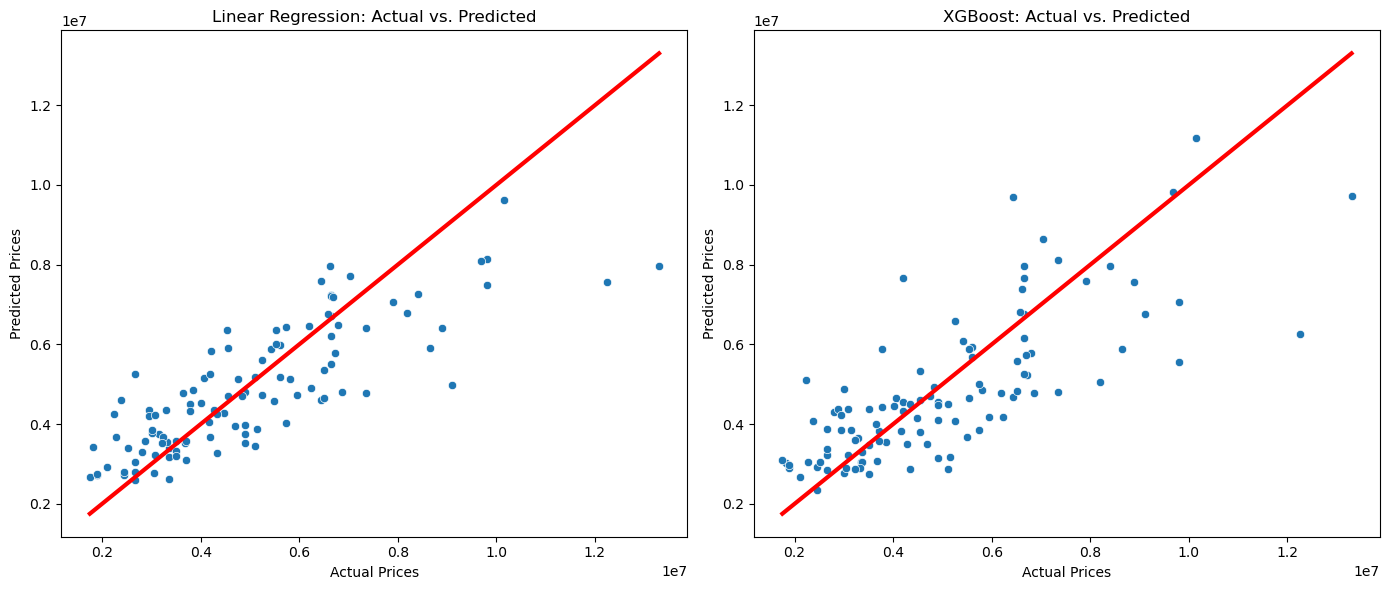

In [20]:
#Step 8: Visualization of Actual vs. Predicted Values
plt.figure(figsize=(14, 6))

#Linear Regression Plot
plt.subplot(1, 2, 1)
sns.scatterplot(x=y_test, y=y_pred_linreg)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=3)
plt.title('Linear Regression: Actual vs. Predicted')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')

#XGBoost Plot
#plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 2)
sns.scatterplot(x=y_test, y=y_pred_xgboost)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=3)
plt.title('XGBoost: Actual vs. Predicted')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.tight_layout()
plt.show()

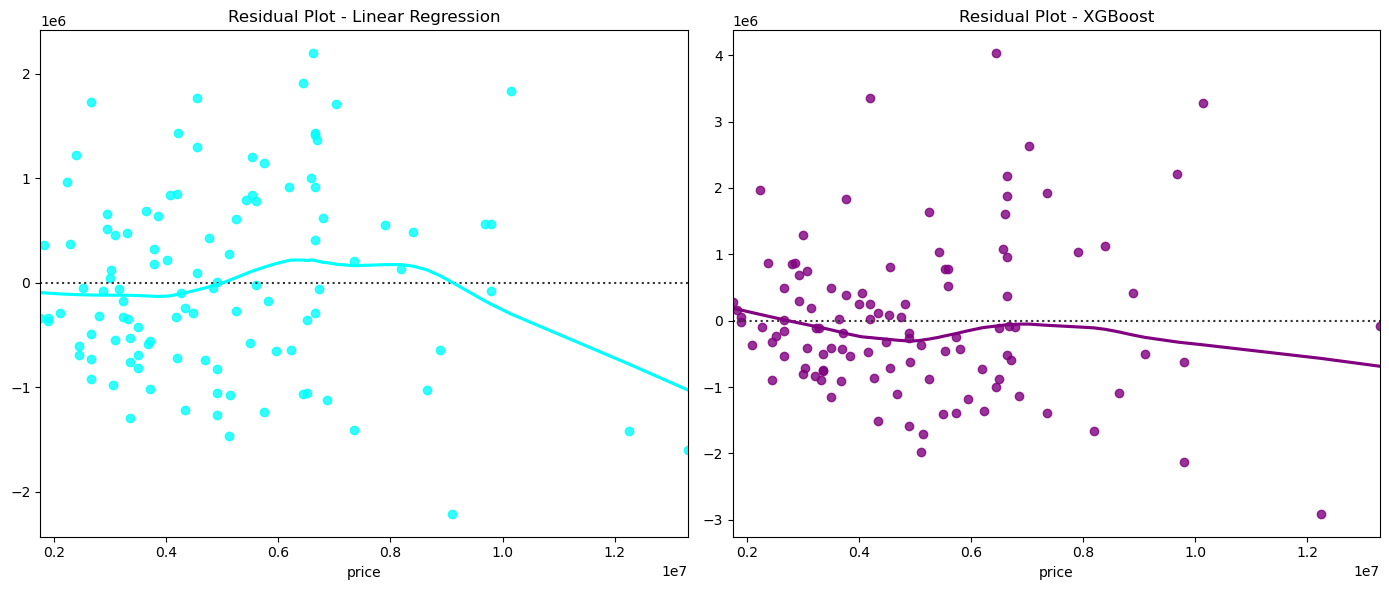

In [21]:
#Step 9: Residual Plots
plt.figure(figsize=(14, 6))

# Residual Plot for Linear Regression
plt.subplot(1, 2, 1)
sns.residplot(x=y_test, y=y_pred_linreg, lowess=True, color='cyan')
plt.title('Residual Plot - Linear Regression')

# Residual Plot for XGBoost
plt.subplot(1, 2, 2)
sns.residplot(x=y_test, y=y_pred_xgboost, lowess=True, color='purple')
plt.title('Residual Plot - XGBoost')

plt.tight_layout()
plt.show()

In [22]:
#Step 10: Making Predictions on New Data

new_data_dict = {
    'area': [3000], 'bedrooms': [4], 'bathrooms': [2], 'stories': [2], 'mainroad': ['yes'],
    'guestroom': ['no'], 'basement': ['no'], 'hotwaterheating': ['no'], 'airconditioning': ['yes'],
    'parking': [2], 'prefarea': ['yes'], 'furnishingstatus': ['semi-furnished']
} #example

In [23]:
new_data = pd.DataFrame(new_data_dict)

In [24]:
linreg_prediction = linreg_pipeline.predict(new_data)
xgboost_prediction = xgboost_pipeline.predict(new_data)

print(f"Predicted Price using Linear Regression: ${linreg_prediction[0]}")
print(f"Predicted Price using XGBoost: ${xgboost_prediction[0]}")

Predicted Price using Linear Regression: $6390935.597744405
Predicted Price using XGBoost: $5336335.0
